# **Project Title: Customer Segmentation Analysis**

What is Unsupervised learning
* Unsupervised learning in artificial intelligence is a type of machine learning that learns from data without human supervision. Unlike supervised learning, unsupervised machine learning models are given unlabeled data and allowed to discover patterns and insights without any explicit guidance or instruction.
* The model is given raw, unlabeled data and has to infer its own rules and structure the information based on similarities, differences, and patterns without explicit instructions on how to work with each piece of data.
* Clustering is a technique for exploring raw, unlabeled data and breaking it down into groups (or clusters) based on similarities or differences. It is used in a variety of applications, including customer segmentation, fraud detection, and image analysis. Clustering algorithms split data into natural groups by finding similar structures or patterns in uncategorized data.

# 1. Importing all the necessary librabries

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading and reading the dataset

In [191]:
data=pd.read_csv("Mall_Customers.csv")

In [192]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. Data Exploration and Inspection

In [193]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [194]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [195]:
data.shape

(200, 5)

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [197]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [198]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# 4. Data Cleaning

### 4.1 Checking for missing values

In [199]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 4.2 Checking for duplicates

In [200]:
data.duplicated().any()

np.False_

### 4.3 Fixing missing values

Insights:
* No missing or duplicated values. So, no action is needed.

# 5. Exploratory Data Analysis

### 5.1 Find the number of male and female customers

In [201]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

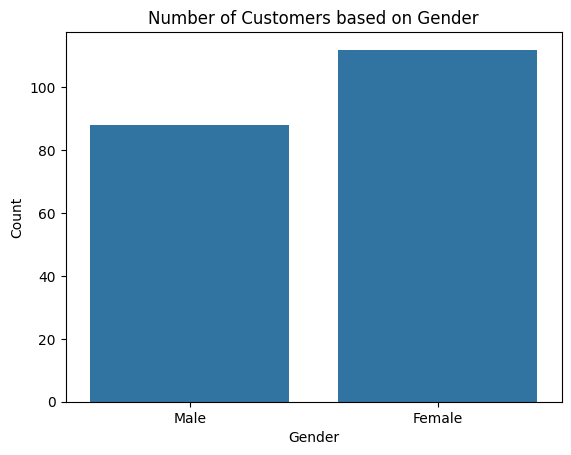

In [202]:
sns.countplot(data=data, x='Gender')
plt.title('Number of Customers based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### 5.2 Remove Unnecessary columns

In [203]:
data = data.drop('CustomerID', axis=1)

In [204]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### 5.3 Group by Gender and calculate mean of 'Annual Income (k$)' and 'Age'

In [205]:
gender_stats = data.groupby('Gender')[['Annual Income (k$)', 'Age']].value_counts()

In [206]:
print(gender_stats)

Gender  Annual Income (k$)  Age
Female  50                  60     2
        78                  30     2
        16                  20     1
                            23     1
        17                  22     1
                                  ..
Male    101                 28     1
        113                 33     1
        126                 32     1
        137                 30     1
                            32     1
Name: count, Length: 196, dtype: int64


### 5.4 Distribution of Age by Gender and its visulaization

<Axes: xlabel='Annual Income (k$)', ylabel='Age'>

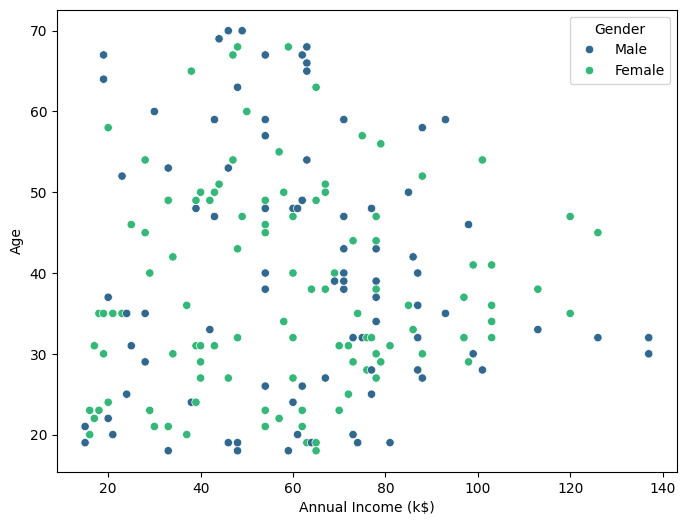

In [207]:
plt.figure(figsize=(8,6),dpi=100)
sns.scatterplot(data=data, x='Annual Income (k$)', y='Age', hue='Gender', palette='viridis')

Insights:
* DPI stands for "dots per inch" and controls the resolution of the figure. A higher dpi results in a more detailed image.
* Hue specifies the color palette for the plot.
* Viridis is a perceptually uniform colormap that works well for visualizing categories.
* From the above graph, there is no linear relation between 'Age' and 'Annual Income (k$)', which is counter-intuitive.

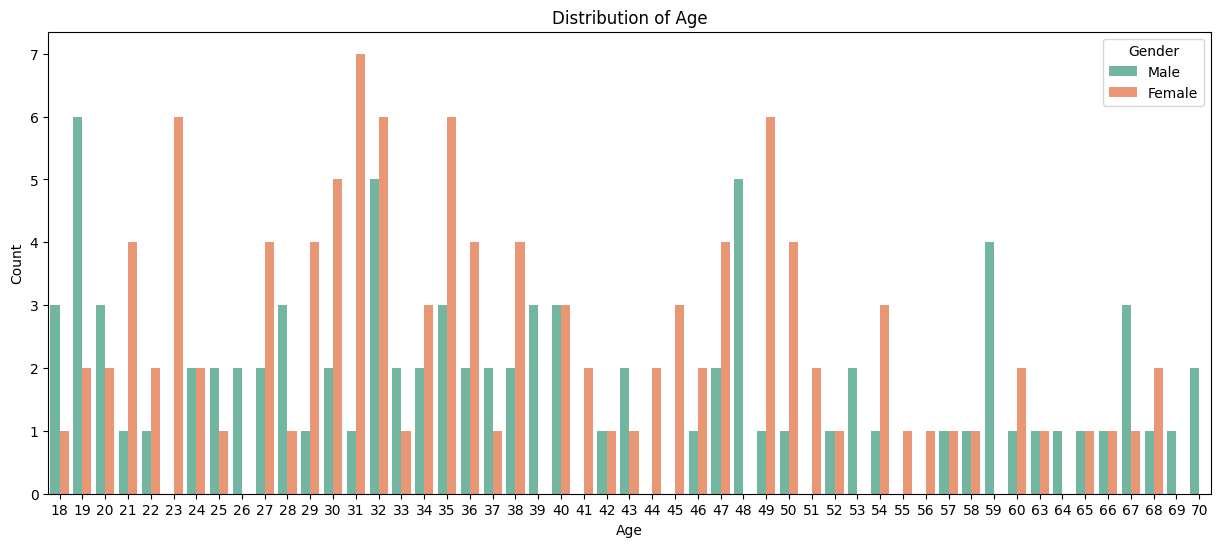

In [208]:
plt.figure(figsize=(15,6),dpi=100)
sns.countplot(data=data, x='Age', hue='Gender', palette='Set2')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [209]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# 6. Encoding Categorical Variables

In [210]:
data['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [211]:
data['Gender']=data['Gender'].map({'Male':1, 'Female':0})

# 7. Checking for the outliers

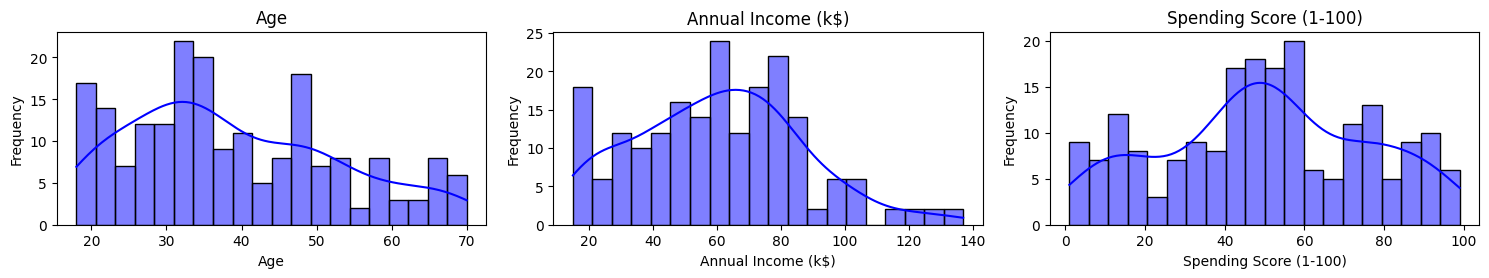

In [212]:
columns_to_plot=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

plt.figure(figsize=(15, 10))

i=1
for column in columns_to_plot:
    plt.subplot(4, 3, i)
    sns.histplot(data[column], kde=True, color='blue', bins=20)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    i+=1
    
    
plt.tight_layout()
plt.show()

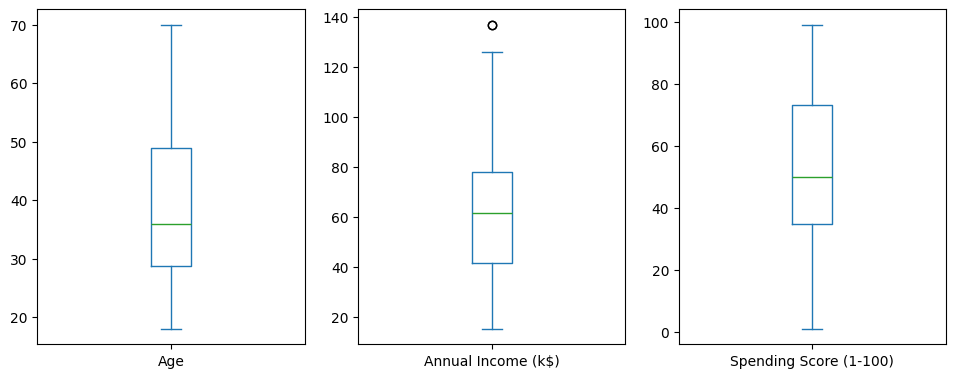

In [213]:
numerical_feature=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

data[numerical_feature].plot(kind='box',subplots=True ,layout=(4, 5), figsize=(20, 20))
plt.show()

# 8. Feature Scaling

## 8.1 Normalization using Standard Scalar

Remark:
* Since the clusturing algos use distance as a metric to create categories, we need to scale the data.

In [214]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(data)

In [215]:
scaled_df

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# 9. Finding the Optimal Clusters

## 9.1 Elbow Method

Elbow method 
* The elbow method is a popular technique used to determine the optimal number of cluster in clustering algorithm 
* Calculate the sum of squared distance between data points and their assigned cluster centroids
* plow the wcss against the number of clsuter
* wcss(within cluster sum of sqaure) is a measure of the compactness of cluster in k means clustering 
*  Mathematically, WCSS = Σ(x - μ)², where:
    * x is each data point in a cluster
    * μ is the cluster's centroid
    * Σ represents the sum across all points in all clusters

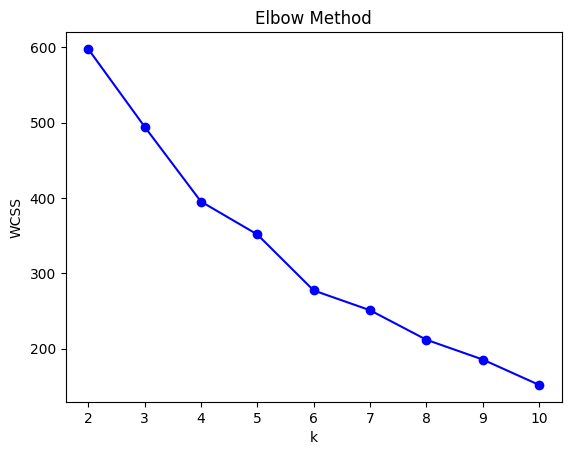

In [216]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(K, wcss, 'bo-')
plt.title('Elbow Method')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

From the graph:
* The elbow point appears around k = 4.
    * That’s the point where the Within-Cluster Sum of Squares (WCSS) starts to decrease at a slower rate. This suggests that adding more clusters beyond this point doesn't give significant improvement.


# 10. Apply K-means

In [217]:
model=KMeans(n_clusters=4, random_state=42)
model.fit(scaled_df)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [218]:
k_means_labels=model.fit_predict(scaled_df)
k_means_labels

array([2, 2, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 3, 2, 0, 3, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 2,
       3, 0, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 3, 0, 0, 2, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 2, 0, 3, 3, 2, 0, 3, 0, 2, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 2, 3, 3, 0, 0, 0, 0, 2, 3, 3, 2, 3, 3, 1, 2, 1, 2, 1, 2,
       3, 3, 1, 3, 1, 2, 1, 3, 1, 2, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 3,
       1, 2, 1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2,
       1, 2], dtype=int32)

In [219]:
data['cluster']=k_means_labels

In [220]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,3
3,0,23,16,77,3
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


In [221]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,3
3,0,23,16,77,3
4,0,31,17,40,3
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


# 11. PCA Visulaization of Clusters

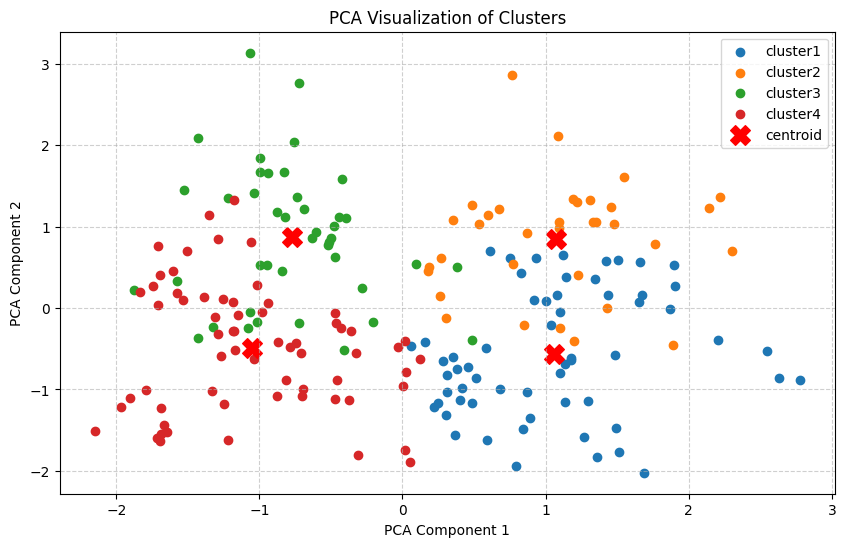

In [222]:
from sklearn.decomposition import PCA

# Use scaled_df for PCA input
pca = PCA(n_components=2)  # Reduce the dimensions to 2 for visualization
pca_result = pca.fit_transform(scaled_df)

# Assign cluster labels to each point
cluster_labels = model.labels_

# Get the cluster centroids and transform them to PCA space
centroids = model.cluster_centers_
centroids_pca = pca.transform(centroids)

# Create a scatter plot of the PCA result
plt.figure(figsize=(10,6))
for cluster in range(4):  # number of clusters is 4
    plt.scatter(
        pca_result[cluster_labels==cluster, 0],
        pca_result[cluster_labels==cluster, 1],
        label=f'cluster{cluster +1}'
    )

# highlight the centroid
plt.scatter(
    centroids_pca[:,0], centroids_pca[:, 1],
    s=200, c='red', marker='X', label='centroid'
)    

# add plot labels and legend
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# 12. EDA After Clustering

## 12.1 Determine which gender is most represented in each cluster

In [223]:
data['cluster'].value_counts()

cluster
3    64
0    60
2    42
1    34
Name: count, dtype: int64

In [224]:
print(data.groupby('cluster')['Gender'].value_counts())

cluster  Gender
0        0         34
         1         26
1        1         20
         0         14
2        1         42
3        0         64
Name: count, dtype: int64


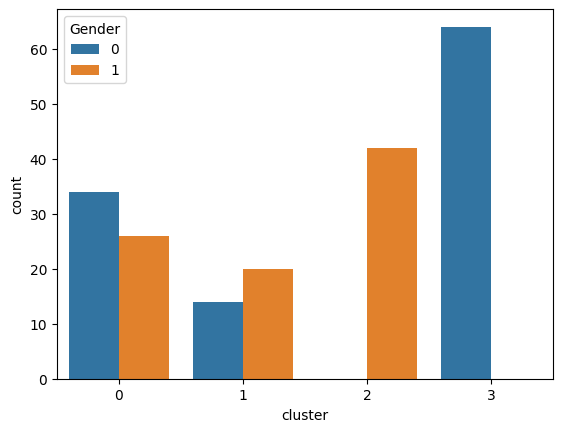

In [227]:
sns.countplot(x=data['cluster'], hue=data['Gender'])
plt.show()

## 12.2 Determine which Age is most represented in each cluster

In [228]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')

In [230]:
top_5_ages_per_cluster = (
    data.groupby('cluster')['Age']
    .value_counts()
    .groupby(level=0)
    .head(5)
)

print(top_5_ages_per_cluster)

cluster  Age
0        49     7
         48     4
         50     4
         67     4
         47     3
1        34     3
         47     3
         19     2
         36     2
         37     2
2        19     4
         32     4
         18     3
         28     3
         35     3
3        31     7
         23     6
         32     6
         30     5
         35     5
Name: count, dtype: int64


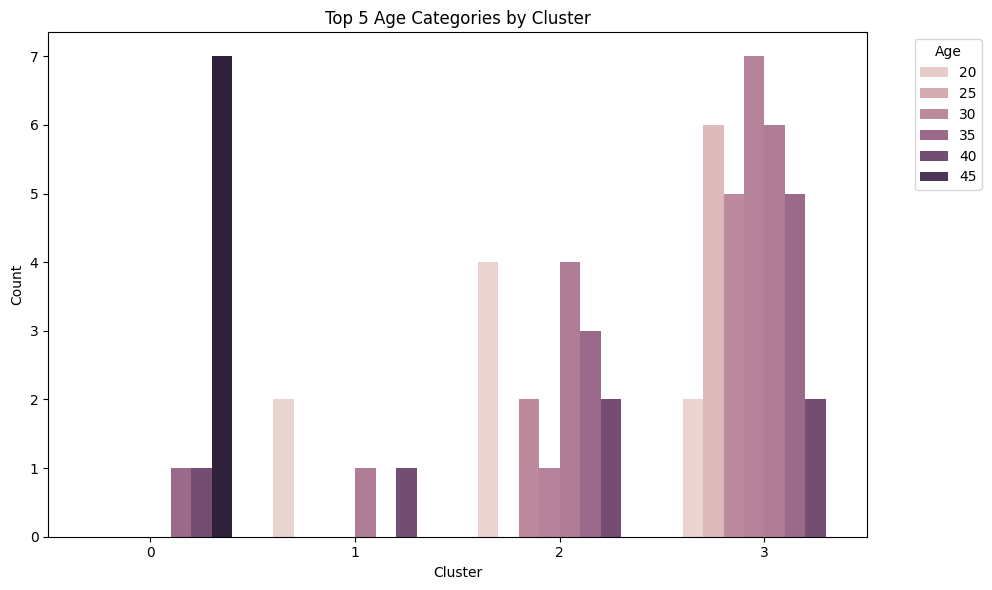

In [233]:
# Get the top 5 age categories
top_5_age_categories = data['Age'].value_counts().nlargest(8).index

# Filter the dataframe to include only the top 5 age categories
df_filtered = data[data['Age'].isin(top_5_age_categories)]

# Create the countplot with filtered data
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', hue='Age', data=df_filtered)
plt.title('Top 5 Age Categories by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 12.3 Determine which spending score (1-100) is most represented in each cluster

In [234]:
data.groupby('cluster')['Spending Score (1-100)'].mean().reset_index()

,cluster,Spending Score (1-100)
0,0,39.933333
1,1,16.764706
2,2,70.238095
3,3,64.437500


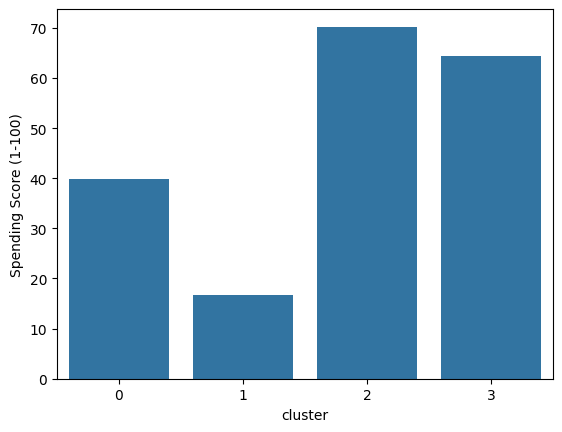

In [238]:
sns.barplot(x='cluster', y='Spending Score (1-100)', data=data, errorbar=None)
plt.show()

## 12.4 Determine what annual income (k$) is most represented in each cluster

In [239]:
data.groupby('cluster')['Annual Income (k$)'].mean().reset_index()

,cluster,Annual Income (k$)
0,0,46.900000
1,1,88.500000
2,2,60.904762
3,3,58.296875


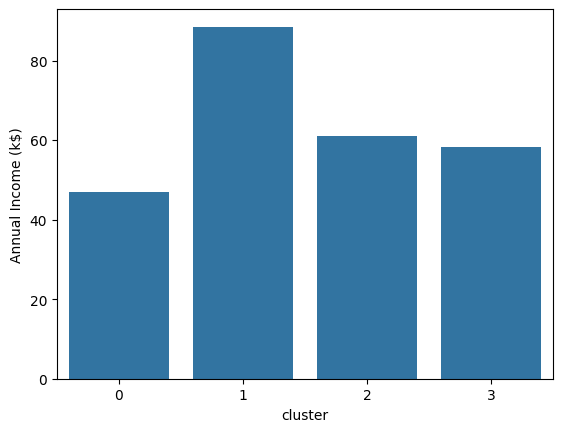

In [240]:
sns.barplot(x='cluster', y='Annual Income (k$)', data=data, errorbar=None)
plt.show()